<a href="https://www.kaggle.com/code/subhajeetdas/netflix-stock-price-prediction?scriptVersionId=125294885" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/netflix-stock-price-prediction/NFLX.csv


# Data Loading

In [2]:
df = pd.read_csv("/kaggle/input/netflix-stock-price-prediction/NFLX.csv")

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


# Data Preparation

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.shape

(1009, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [8]:
train, test = train_test_split(df, test_size = 0.2)

In [9]:
test_pred = test.copy()

In [10]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
324,2019-05-21,350.950012,356.429993,349.929993,354.269989,354.269989,4026400
212,2018-12-07,282.480011,284.209991,263.380005,265.140015,265.140015,12466700
330,2019-05-30,350.549988,354.209991,348.299988,351.850006,351.850006,4008000
939,2021-10-27,669.000000,671.409973,661.849976,662.919983,662.919983,2276900
622,2020-07-27,484.510010,496.920013,482.309998,495.649994,495.649994,7863100
14,2018-02-26,288.750000,295.649994,287.010010,294.160004,294.160004,10268600
962,2021-11-30,668.200012,675.380005,640.010010,641.900024,641.900024,5608900
768,2021-02-24,539.799988,556.849976,539.070007,553.409973,553.409973,3245000
710,2020-11-30,490.079987,492.549988,481.269989,490.700012,490.700012,3530900
567,2020-05-07,436.890015,438.880005,430.660004,436.529999,436.529999,5641900


In [11]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
254,2019-02-08,338.000000,348.000000,338.000000,347.570007,347.570007,7561400
889,2021-08-17,515.469971,520.789978,514.200012,518.909973,518.909973,2309800
64,2018-05-08,325.899994,327.350006,323.049988,326.890015,326.890015,4735700
594,2020-06-16,425.760010,437.959991,425.179993,436.130005,436.130005,5507900
357,2019-07-09,379.059998,384.760010,377.500000,379.929993,379.929993,6932800
133,2018-08-15,334.029999,335.500000,321.000000,326.399994,326.399994,11784500
592,2020-06-12,429.000000,434.059998,412.450012,418.070007,418.070007,6461100
344,2019-06-19,361.720001,364.739990,356.119995,363.519989,363.519989,5667200
94,2018-06-20,415.149994,419.470001,409.600006,416.760010,416.760010,16494600
668,2020-09-30,492.570007,504.630005,489.269989,500.029999,500.029999,4634100


In [12]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [13]:
y_train = train['Close'].values
y_test = test['Close'].values

# Linear Regression

In [14]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model_lnr.predict(x_test)

In [16]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.7892564]


# Model Evaluation

In [17]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 14.122
RMSE 3.758
R2 Score :  0.999


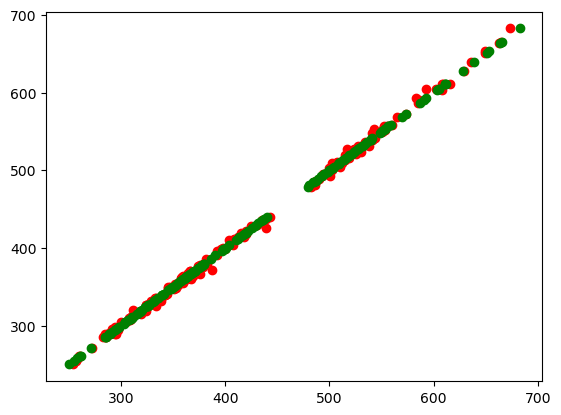

In [18]:
plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='green')

In [19]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
254,2019-02-08,338.000000,348.000000,338.000000,347.570007,347.570007,7561400,346.332837
889,2021-08-17,515.469971,520.789978,514.200012,518.909973,518.909973,2309800,518.590961
64,2018-05-08,325.899994,327.350006,323.049988,326.890015,326.890015,4735700,324.992926
594,2020-06-16,425.760010,437.959991,425.179993,436.130005,436.130005,5507900,435.167771
357,2019-07-09,379.059998,384.760010,377.500000,379.929993,379.929993,6932800,382.654424
...,...,...,...,...,...,...,...,...
554,2020-04-20,435.170013,444.489990,430.559998,437.489990,437.489990,12655800,439.494650
701,2020-11-16,480.000000,485.579987,477.299988,479.100006,479.100006,3953600,482.309963
104,2018-07-05,393.799988,399.239990,390.859985,398.390015,398.390015,8448900,396.161259
399,2019-09-06,293.350006,293.350006,287.029999,290.170013,290.170013,5166600,288.556145


In [20]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,417.398861,104.370787,250.100006,336.647492,376.419998,509.082489,682.609985
Close_Prediction,202.0,417.306593,103.748728,254.341140,338.652699,377.301026,509.645424,673.450807


<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you! For viewing this Notebook, do upvote if you like it and please feel free to provide feedback.</em><br>
<br>    
<p style="text-align:center"><img src="https://allfreethankyounotes.com/wp-content/uploads/2021/01/all-free-thank-you-gif-3.gif" width="480" height="373"></p>